In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit,Aer,assemble
from numpy import pi

In [9]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.x(qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])


circuit.cx(qreg_q[2], qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
q0 = circuit.measure(qreg_q[0], creg_c[0])
q1 = circuit.measure(qreg_q[1], creg_c[1])
q2 = circuit.measure(qreg_q[2], creg_c[2])

circuit.measure(qreg_q[3], creg_c[3])
circuit.draw()

░ ┌───┐           ░ ┌───┐ ░ ┌─┐         
q_0: ─|0>──░─┤ H ├──■────────░─┤ H ├─░─┤M├─────────
           ░ ├───┤  │        ░ ├───┤ ░ └╥┘┌─┐      
q_1: ─|0>──░─┤ H ├──┼────────░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤  │        ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ─|0>──░─┤ H ├──┼────■───░─┤ H ├─░──╫──╫─┤M├───
     ┌───┐ ░ ├───┤┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║ └╥┘┌─┐
q_3: ┤ X ├─░─┤ H ├┤ X ├┤ X ├─░───────░──╫──╫──╫─┤M├
     └───┘ ░ └───┘└───┘└───┘ ░       ░  ║  ║  ║ └╥┘
c: 4/═══════════════════════════════════╩══╩══╩══╩═
                                        0  1  2  3

In [10]:
sv_sim = Aer.get_backend('aer_simulator')
circuit.save_statevector()
qobj = assemble(circuit)
job = sv_sim.run(qobj)
ket = job.result().get_statevector()
ket

array([ 0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
        0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
       -0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
        0.+0.000000e+00j,  0.+0.000000e+00j,  0.+0.000000e+00j,
        0.+0.000000e+00j, -1.+3.061617e-16j,  0.+0.000000e+00j,
        0.+0.000000e+00j])

In [11]:
hist = job.result().get_counts()
print(hist)

{'1101': 521, '0101': 503}


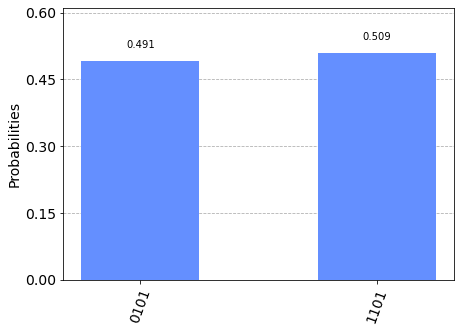

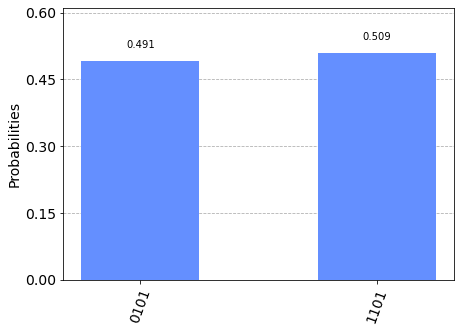

In [12]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)